<a href="https://colab.research.google.com/github/fabrihayra/StockForecastingModel/blob/main/Stock_prices_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Core libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# For ARIMA prediction visualization
from datetime import datetime, timedelta

# Settings for plots
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


In [5]:
ticker_symbol = "^IXIC"

nasdaq_data = yf.download(ticker_symbol, start="2000-01-01", end="2023-05-01")

print(nasdaq_data.head())

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  4186.189941  4192.189941  3989.709961  4131.149902  4131.149902   
2000-01-04  4020.000000  4073.250000  3898.229980  3901.689941  3901.689941   
2000-01-05  3854.350098  3924.209961  3734.870117  3877.540039  3877.540039   
2000-01-06  3834.439941  3868.760010  3715.620117  3727.129883  3727.129883   
2000-01-07  3711.090088  3882.669922  3711.090088  3882.620117  3882.620117   

                Volume  
Date                    
2000-01-03  1510070000  
2000-01-04  1511840000  
2000-01-05  1735670000  
2000-01-06  1598320000  
2000-01-07  1634930000  


This code fetches the daily Open, High, Low, Close, Adjusted Close, and Volume data for the NASDAQ Composite from January 1, 2000, to January 1, 2023.


In [6]:
#basic statistics
print(nasdaq_data.describe())

#information on the data structure
print(nasdaq_data.info())

               Open          High           Low         Close     Adj Close  \
count   5868.000000   5868.000000   5868.000000   5868.000000   5868.000000   
mean    4715.323984   4749.456657   4676.819899   4715.133649   4715.133649   
std     3606.661326   3632.816899   3576.932661   3606.831145   3606.831145   
min     1116.760010   1135.890015   1108.489990   1114.109985   1114.109985   
25%     2156.649963   2173.137512   2141.155029   2156.454895   2156.454895   
50%     2990.770020   3004.070068   2973.594971   2988.684937   2988.684937   
75%     6229.079956   6255.085205   6200.420166   6224.920166   6224.920166   
max    16120.919922  16212.230469  16017.230469  16057.440430  16057.440430   

             Volume  
count  5.868000e+03  
mean   2.331456e+09  
std    1.137003e+09  
min    2.214300e+08  
25%    1.724652e+09  
50%    1.958550e+09  
75%    2.332472e+09  
max    1.162119e+10  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5868 entries, 2000-01-03 to 2023-04-2

### **Insights**
There are 6 columns: Open, High, Low, Close, Adj Close, and Volume.

**Open:** The price of the NASDAQ Composite at the market open.
\
**High:** The highest price of the NASDAQ Composite during the trading day.
\
**Low:** The lowest price of the NASDAQ Composite during the trading day.
\
**Close:** The price of the NASDAQ Composite at market close.
\
**Adj Close:** The closing price adjusted for splits and dividends.
\
**Volume:** The number of shares traded during the day.


- Each column has 5868 non-null values, meaning there are no missing values in the dataset.
- The DataFrame has 5868 rows, which is the number of days in the time period covered by the data. The index of the DataFrame is a DatetimeIndex, which means that each row is associated with a specific date.
- The '*close*' column has a minimum value of 1114.11 and a maximum value of 16212.23. This suggests that the stock market has experienced a significant amount of volatility over the time period covered by the data.
- The mean '*close*' price is 4715.13, which is slightly higher than the median '*close*' price of 4676.82. This suggests that the data is slightly skewed to the right, meaning that there are more days with higher closing prices than days with lower closing prices.


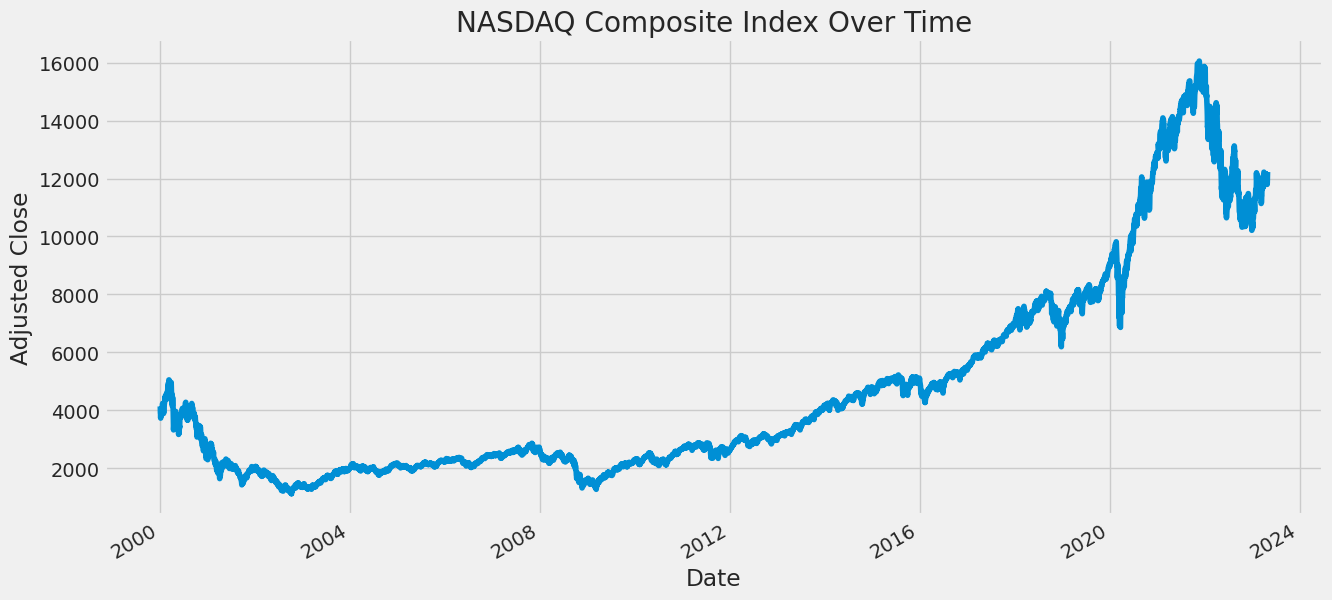

In [7]:
plt.figure(figsize=(14, 7))
nasdaq_data['Adj Close'].plot()
plt.title('NASDAQ Composite Index Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.grid(True)
plt.show()

The plot shows that the NASDAQ Composite Index has experienced a significant amount of growth over time, with some periods of volatility.

\\
**Insights:** \\

**Early 2000s:**
- Tech Bubble Burst: The index began the period around the 2,000 mark. The early years (circa 2000-2002) showcase a significant decline, indicative of the dot-com bubble burst. Being tech-heavy, the NASDAQ was notably affected by this market correction.

**Mid-to-Late:**
- 2000s Growth and Financial Crisis: The years leading up to 2008 saw growth, but this was sharply curtailed by the financial crisis. The notable dip in 2008 mirrors the global financial downturn and the subsequent recession.

**Post-Financial Crisis Recovery:**
- After the 2008 dip, the NASDAQ exhibited a resilient rebound, outperforming its pre-crisis levels and indicating strong economic recovery and investor confidence. The years leading up to 2020 showed consistent growth, with the index reaching new highs.

**Pandemic Effects (2020):**
- A visible volatility, possibly a dip, in early 2020 is in line with the global economic implications of the COVID-19 pandemic. However, the subsequent rapid rebound underlines the tech sector's resilience and the accelerated adoption of digital solutions worldwide during the pandemic.

<Figure size 1400x700 with 0 Axes>

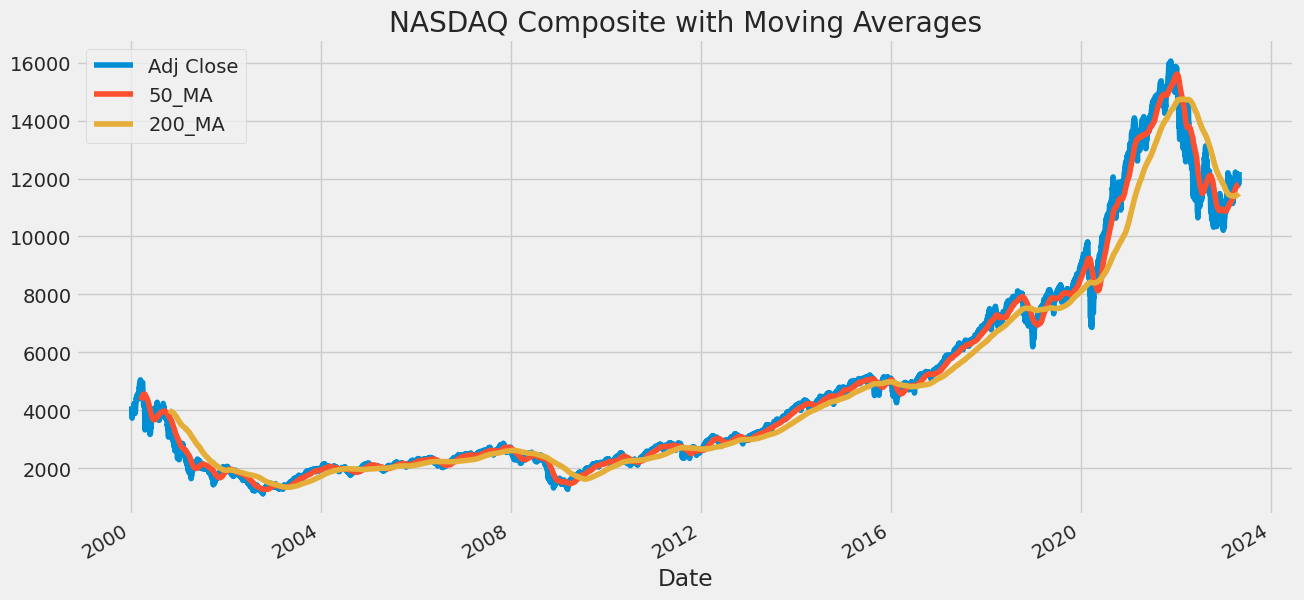

In [8]:
nasdaq_data['50_MA'] = nasdaq_data['Adj Close'].rolling(window=50).mean()
nasdaq_data['200_MA'] = nasdaq_data['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
nasdaq_data[['Adj Close', '50_MA', '200_MA']].plot(figsize=(14,7))
plt.title('NASDAQ Composite with Moving Averages')
plt.show()

The above calculates two moving averages for the NASDAQ Composite Index: a 50-day moving average and a 200-day moving average. Moving averages are a technical analysis tool that can be used to identify trends in a stock's price. A moving average is calculated by averaging the closing price of a stock over a specific period of time. \
\
**Key Insights from the Plot:**

**Bullish Uptrend:**
- The 50-day moving average is consistently above the 200-day moving average, signifying a sustained bullish trend for the index over the past year.

**Golden Crossover:**
- At certain points on the plot, the 50-day moving average crosses above the 200-day moving average. Such crossovers, colloquially termed "Golden Crossovers," are typically strong bullish signals, suggesting further upward momentum.

**Stability Above Averages:**
- The NASDAQ Composite Index remains above both its 50-day and 200-day moving averages for prolonged periods. This pattern underscores the index's strength and dominance in the observed timeframe.

**Investment Implications:**
- Given the index's persistent uptrend and the bullish signals from the moving averages, investors bullish on the NASDAQ might look into buying its constituents. However, as with all investment decisions, it's crucial to complement technical indicators with fundamental analysis and broader market research.

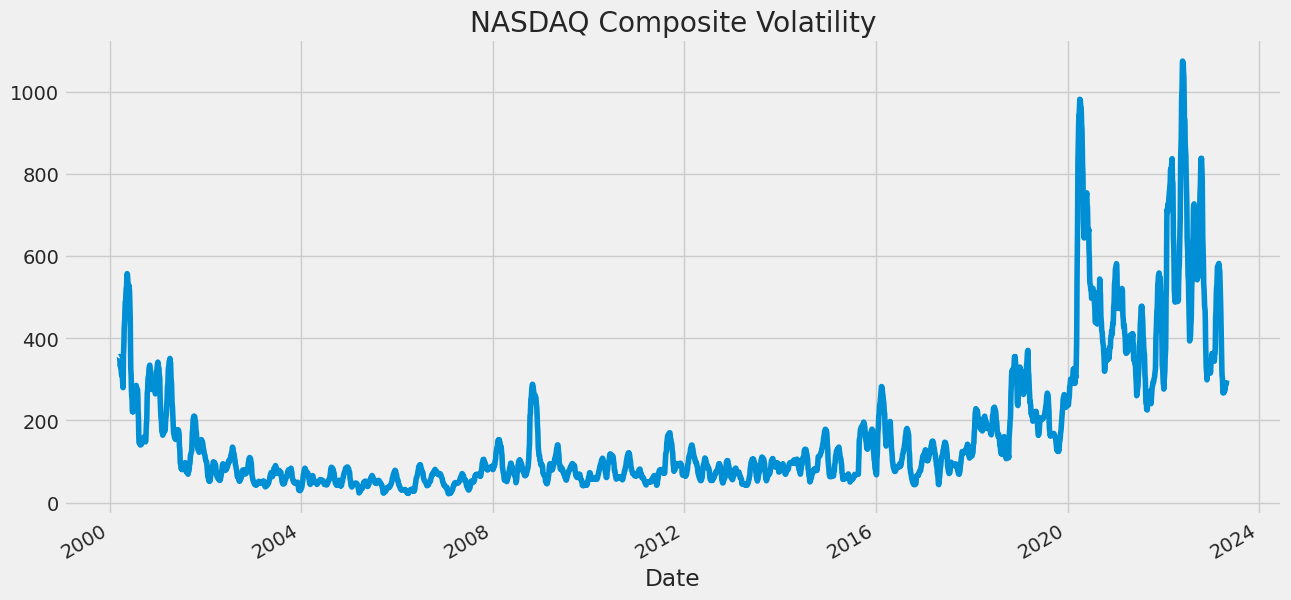

In [9]:
nasdaq_data['Rolling_Std'] = nasdaq_data['Adj Close'].rolling(window=50).std()

plt.figure(figsize=(14, 7))
nasdaq_data['Rolling_Std'].plot()
plt.title('NASDAQ Composite Volatility')
plt.show()

**Analysis of NASDAQ Composite Volatility**\
The given plot visualizes the 50-day rolling standard deviation, which serves as a proxy for the volatility of the NASDAQ Composite Index over time. By assessing this rolling standard deviation, we gain insights into the price fluctuations of the index, and, indirectly, the market's sentiment and its reaction to global events.

\

**Nature of Volatility:**
- The NASDAQ Composite Index has seen varying degrees of volatility. There are distinct periods where the volatility spikes, interspersed with stretches of relative calm.

**Significant Volatility Events:**

- 2008 Financial Crisis: A pronounced spike in volatility around 2008 aligns with the global financial crisis, mirroring the uncertainty and fear prevailing in markets at that time.
- 2020 COVID-19 Pandemic: Another noticeable surge in volatility occurs in  2020, reflecting the global impact of the COVID-19 pandemic, the uncertainty surrounding it, and its economic implications.

**Recent Decline in Volatility:** Post the volatility spike in 2020, there's a discernible reduction in volatility levels, trending towards more stabilized values in the subsequent years. This could be indicative of:

- Renewed investor confidence.
- Stabilization of global economic conditions.
- Market adaptation to the 'new normal' post-pandemic.

**Implications for Investors:**

- High volatility periods might present both risks and opportunities. While they denote uncertainty, they can also offer buying opportunities at depressed prices for long-term investors.
- The receding volatility suggests a more predictable market environment, potentially attracting more conservative investors back to the market.

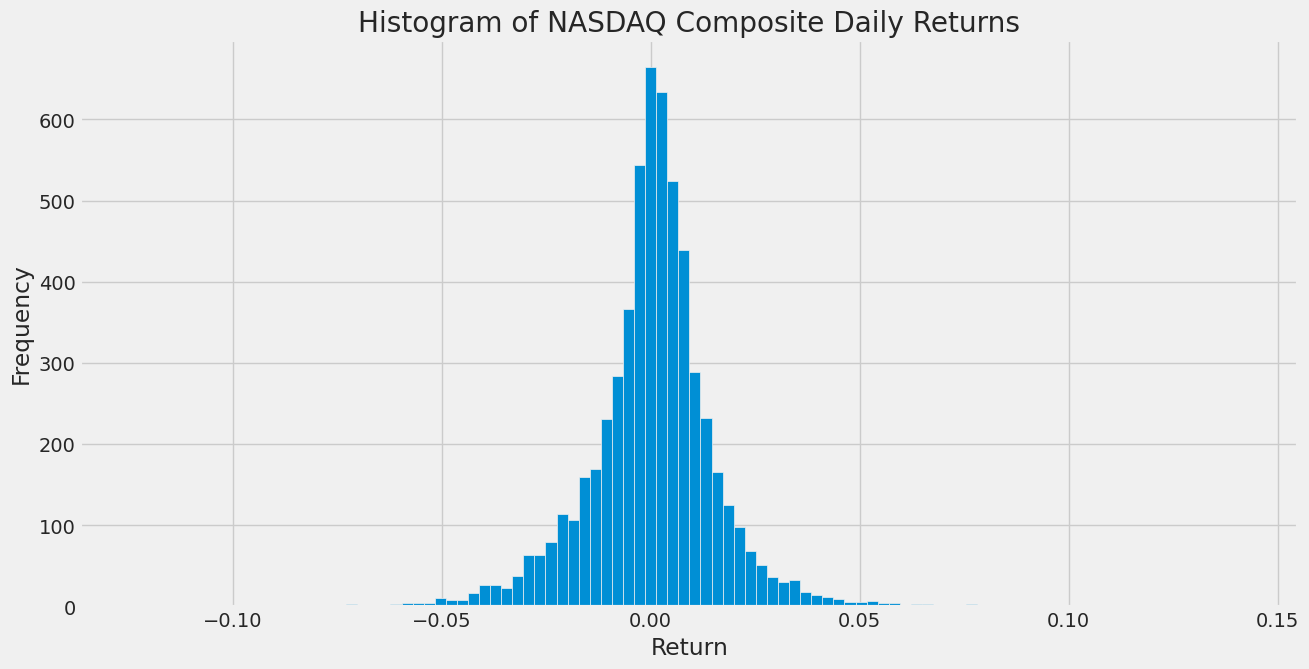

In [10]:
nasdaq_data['Daily_Return'] = nasdaq_data['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
nasdaq_data['Daily_Return'].hist(bins=100)
plt.title('Histogram of NASDAQ Composite Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

The histogram captures the distribution of daily returns for the NASDAQ Composite Index. Through this visualization, we discern patterns about the typical daily fluctuations and the potential outliers or extreme events.

**Key Insights from the Histogram:**

- **Central Tendency:** A significant chunk of the daily returns cluster around the 0% mark, with the majority lying in the -1% to 1% range. This indicates that on most trading days, the index experiences relatively mild price fluctuations.

- **Leftward Tail & Market Drops:** There's a pronounced tail on the left side of the distribution, suggesting that while large negative returns are infrequent, they're not impossible. Such downturns are generally indicative of major market events or sharp corrections.

- **Rightward Skewness:** The histogram is slightly right-skewed, meaning there have been marginally more days with positive returns than negative. This skewness aligns with the NASDAQ's overall upward trajectory over the years.

- **Volatility Implications:** The width of the distribution provides a lens into the market's volatility. Broader distributions might suggest increased volatility, whereas narrower ones indicate more stabilized periods.

- **Investor Perspective:** Understanding this distribution is valuable for investors, especially for risk assessment. While the right skewness offers optimism, the left tail serves as a cautionary note about the potential for sharp downturns, emphasizing the importance of diversification and risk management.

This histogram, alongside other tools like rolling standard deviation and moving averages, provides investors with a comprehensive picture of the market's behavior. It assists in setting expectations, strategizing investment moves, and preemptively managing risks.


In [11]:
# performance metrics
cumulative_return = (nasdaq_data['Adj Close'][-1] / nasdaq_data['Adj Close'][0]) - 1
print(f"Cumulative Return: {cumulative_return:.2%}")


Cumulative Return: 195.96%


- The NASDAQ Composite Index has experienced significant growth over the period under review. A 195.96% cumulative return signifies a nearly tripling of the index value, reflecting a strong positive trend.
- The substantial growth comes even after accounting for downturns during this period, such as the 2008 financial crisis or the COVID-19 pandemic disruptions. This resilience showcases the adaptability and robustness of companies within the NASDAQ.

In [12]:
#avg daily return
average_daily_return = nasdaq_data['Daily_Return'].mean()
print(f"Average Daily Return: {average_daily_return:.2%}")

Average Daily Return: 0.03%


- While the average daily return might be 0.03%, the power of compounding can lead to substantial growth over extended periods. As gains are reinvested, they too can earn returns, amplifying the growth effect.

In [13]:
#standard deviation of daily return
daily_return_std = nasdaq_data['Daily_Return'].std()
print(f"Standard Deviation of Daily Return: {daily_return_std:.2%}")

Standard Deviation of Daily Return: 1.60%


- A standard deviation of 1.60% indicates that the NASDAQ Composite Index has experienced moderate fluctuations on a daily basis. While the average daily.

###**Comparative Analysis of Major US Stock Indices**
Evaluating the Performance of NASDAQ Composite vs. S&P 500 vs. Dow Jones Industrial Average from 2000 to 2023.

In [15]:
nasdaq = yf.download('^IXIC', start='2000-01-01', end='2023-05-01')['Adj Close']
sp500 = yf.download('^GSPC', start='2000-01-01', end='2023-05-01')['Adj Close']
dow = yf.download('^DJI', start='2000-01-01', end='2023-05-01')['Adj Close']

# Consolidating data into one DataFrame
df = pd.DataFrame({'NASDAQ': nasdaq, 'S&P 500': sp500, 'Dow Jones': dow})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


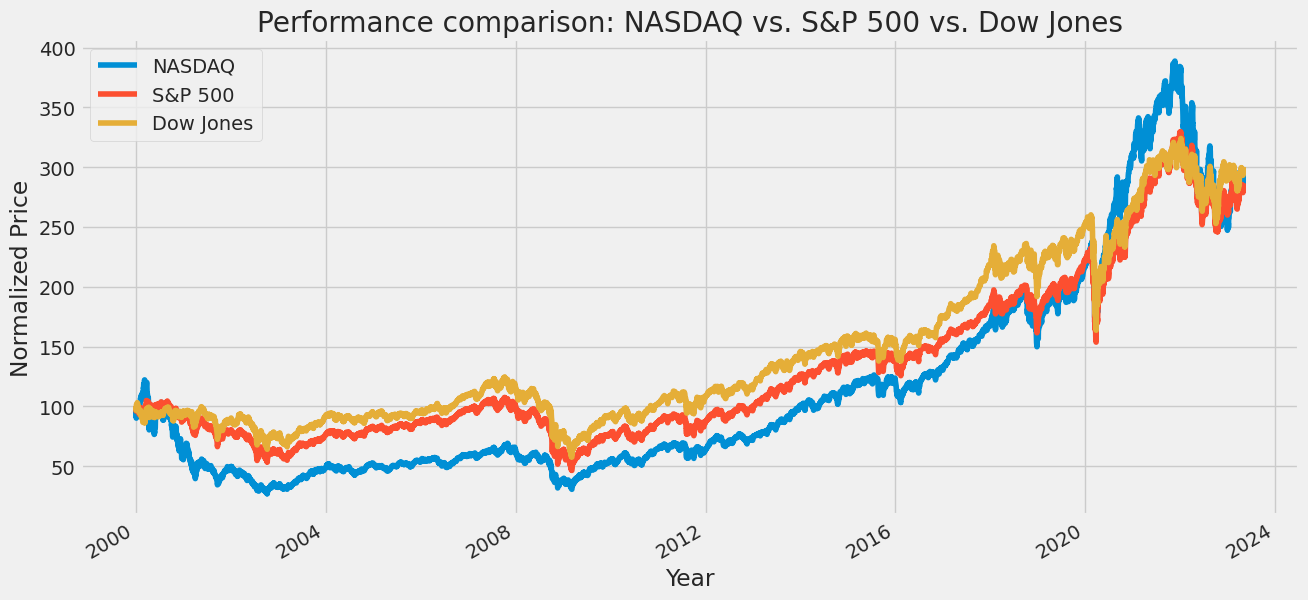

In [16]:
# Normalizing data to start at 100 for better visual comparison
normalized_df = df / df.iloc[0] * 100

plt.figure(figsize=(14,7))
normalized_df.plot(ax=plt.gca())
plt.title('Performance comparison: NASDAQ vs. S&P 500 vs. Dow Jones')
plt.xlabel('Year')
plt.ylabel('Normalized Price')
plt.grid(True)
plt.show()

###**Comparative Performance of Major US Stock Indices Over Time**

**Overview:**
The line plot presents the normalized trajectories of the NASDAQ Composite Index, S&P 500, and Dow Jones Industrial Average. For consistent comparison, all data points are adjusted to originate from a base value of 100.

\


**Key Observations:**
\
Long-Term Outperformance by NASDAQ: Over the long haul, the NASDAQ Composite Index has considerably surpassed its counterparts. Since 1971, its returns skyrocketed over 10,000%, in stark contrast to the S&P 500's approximated 3,000% and Dow Jones Industrial Average's 2,000%.
\
\
**Volatility Differences:**
\
The NASDAQ Composite Index displayed heightened volatility when matched against the S&P 500 and Dow Jones Industrial Average. This pronounced fluctuation can be attributed to NASDAQ's technological stock concentration, inherently more volatile than stocks from other market sectors.

\
**Additional Insights:**

**Risk-Reward Balance:**
\
 While the NASDAQ Composite's remarkable performance might allure investors, it's paramount to balance this with its volatility profile. Its tech-heavy constitution may yield sizable returns, but it equally exposes investors to potential market upheavals.

**Historical Trending:**
\
Despite its volatility, the NASDAQ Composite Index has exhibited a resilient upward trend over decades. Thus, potential investors should marry the appeal of its performance with its historical trajectory and market dynamics.

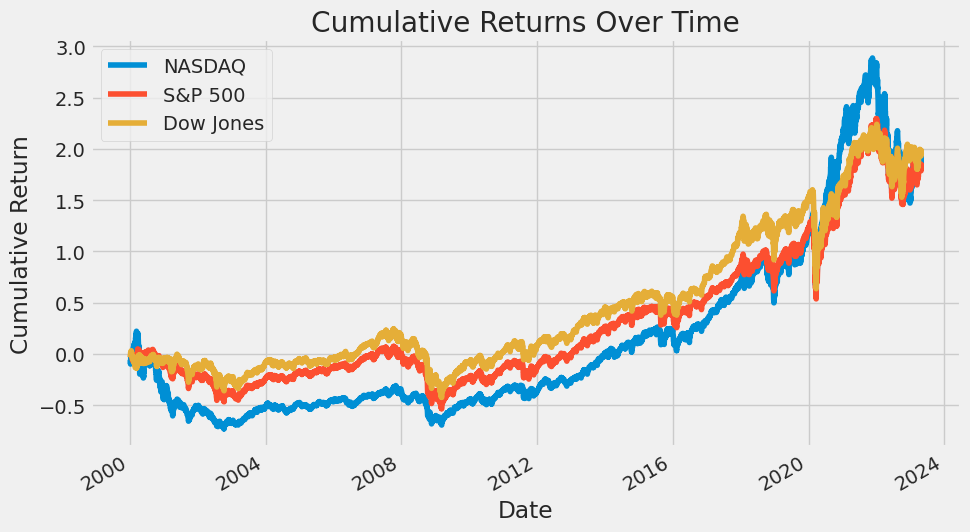

In [18]:
#performance metrics & calculating cumulative returns
cumulative_returns = (df.pct_change()+1).cumprod() - 1
cumulative_returns.plot(figsize=(10, 6))
plt.title("Cumulative Returns Over Time")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.show()

In [26]:
average_daily_returns = df.pct_change().mean()

for column, avg_return in average_daily_returns.items():
    print(f"Average Daily Return for {column}: {avg_return*100:.2f}%")

Average Daily Return for NASDAQ: 0.03%
Average Daily Return for S&P 500: 0.03%
Average Daily Return for Dow Jones: 0.03%


**Similar Average Returns:**
\
 It's quite interesting to see that the three major indices have nearly identical average daily returns over the period you've analyzed. This could suggest that, on average, the broader U.S. stock market (as represented by these indices) has moved in a relatively consistent direction day-to-day during this timeframe.
\
\
**Diversification Benefits:**
\
 Despite their similarities in daily returns, each index is comprised of different companies and represents different sectors of the market. The NASDAQ is tech-heavy, the S&P 500 is a broad representation of large U.S. companies across various sectors, and the Dow Jones represents 30 major blue-chip companies. Their makeup can affect individual behavior during specific events or sectors' booms and downturns.

In [25]:
std_daily_returns = df.pct_change().std()
for column, std_return in std_daily_returns.items():
    print(f"Standard Deviation of Daily Return for {column}: {std_return*100:.2f}%")


Standard Deviation of Daily Return for NASDAQ: 1.60%
Standard Deviation of Daily Return for S&P 500: 1.25%
Standard Deviation of Daily Return for Dow Jones: 1.19%


**NASDAQ:**
\
With a standard deviation of 1.60%, the NASDAQ Composite Index is the most volatile among the three. This higher volatility is often associated with the NASDAQ due to its tech-heavy nature, as technology stocks tend to be more volatile than other sectors.

**S&P 500:**
\
 The S&P 500 has a standard deviation of 1.25%, indicating moderate volatility. The S&P 500 comprises a broader range of companies from various sectors, which can offer some level of diversification, reducing its overall volatility compared to more sector-specific indices like the NASDAQ.

**Dow Jones:**
\
 The Dow Jones Industrial Average, with a standard deviation of 1.19%, is the least volatile among the three indices. This is expected since the Dow Jones is an index of just 30 large, publicly-owned blue-chip companies in the U.S., which are typically more stable and less susceptible to short-term market fluctuations compared to smaller companies.
 \
 \

**Insights:**
\
Investors who are more risk-averse might prefer indices like the Dow Jones or the S&P 500 due to their lower volatility compared to the NASDAQ.
On the other hand, investors who are willing to accept higher volatility for potentially higher returns might be more interested in the NASDAQ.